<a href="https://colab.research.google.com/github/Chanwoongs/Natural_Language_Processing/blob/main/HateSpeechClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 환경설정

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
!pip install transformers
!pip install datasets==1.17.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. 데이터셋 Load

In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset('smilegate-ai/kor_unsmile')

  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    valid: Dataset({
        features: ['문장', '여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean', '개인지칭', 'labels'],
        num_rows: 3737
    })
    train: Dataset({
        features: ['문장', '여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean', '개인지칭', 'labels'],
        num_rows: 15005
    })
})

In [6]:
dataset["train"][500]

{'문장': '트잰 니들만 힘드냐? 멀쩡한 사람도 다 힘들다. 피해자 코스프레 하지마라.',
 '여성/가족': 0,
 '남성': 0,
 '성소수자': 1,
 '인종/국적': 0,
 '연령': 0,
 '지역': 0,
 '종교': 0,
 '기타 혐오': 0,
 '악플/욕설': 0,
 'clean': 0,
 '개인지칭': 0,
 'labels': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]}

In [7]:
dataset["valid"][0]

{'문장': 'ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가 나 안찌르면 내가 너 찌른다 했더니 애비충 냄동충 알아서기노 ^됫^ 한번 서열 잡고 그 담에 개길때마다 더 세게나가면 확실하게 짓누를수있다익이',
 '여성/가족': 0,
 '남성': 1,
 '성소수자': 0,
 '인종/국적': 0,
 '연령': 0,
 '지역': 0,
 '종교': 0,
 '기타 혐오': 0,
 '악플/욕설': 0,
 'clean': 0,
 '개인지칭': 0,
 'labels': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}

In [8]:
import pandas as pd

pdDatasetTrain = dataset["train"].to_pandas()

df = pd.DataFrame(columns=['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean'], index = ['train'])

condition = pdDatasetTrain['여성/가족'] == 1
femaleTrain = pdDatasetTrain.loc[condition, '여성/가족'].count()
df['여성/가족'] = [femaleTrain]

condition = pdDatasetTrain['남성'] == 1
maleTrain = pdDatasetTrain.loc[condition, '남성'].count()
df['남성'] = [maleTrain]

condition = pdDatasetTrain['성소수자'] == 1
minorSexTrain = pdDatasetTrain.loc[condition, '성소수자'].count()
df['성소수자'] = [minorSexTrain]

condition = pdDatasetTrain['인종/국적'] == 1
racismTrain = pdDatasetTrain.loc[condition, '인종/국적'].count()
df['인종/국적'] = [racismTrain]

condition = pdDatasetTrain['연령'] == 1
ageTrain = pdDatasetTrain.loc[condition, '연령'].count()
df['연령'] = [ageTrain]

condition = pdDatasetTrain['지역'] == 1
regionTrain = pdDatasetTrain.loc[condition, '지역'].count()
df['지역'] = [regionTrain]

condition = pdDatasetTrain['종교'] == 1
relTrain = pdDatasetTrain.loc[condition, '종교'].count()
df['종교'] = [relTrain]

condition = pdDatasetTrain['기타 혐오'] == 1
commonTrain = pdDatasetTrain.loc[condition, '기타 혐오'].count()
df['기타 혐오'] = [commonTrain]

condition = pdDatasetTrain['악플/욕설'] == 1
curseTrain = pdDatasetTrain.loc[condition, '악플/욕설'].count()
df['악플/욕설'] = [curseTrain]

condition = pdDatasetTrain['clean'] == 1
cleanTrain = pdDatasetTrain.loc[condition, 'clean'].count()
df['clean'] = [cleanTrain]

df


,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
train,1599,1347,1141,1728,603,1052,1181,569,3143,3739


In [9]:
pdDatasetTrain = dataset["train"].to_pandas()

stringList = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

df = pd.DataFrame(columns = stringList, index = ['train'])

for string in stringList:
  condition = pdDatasetTrain[string] == 1
  num = pdDatasetTrain.loc[condition, string].count()
  df[string] = [num]

df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
train,1599,1347,1141,1728,603,1052,1181,569,3143,3739


In [17]:
pdDatasetTrain = dataset["train"].to_pandas()
pdDatasetValid = dataset["valid"].to_pandas()

stringList = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

df = pd.DataFrame(columns = stringList, index = ['train', 'valid', 'total'])

for string in stringList:
  trainCondition = pdDatasetTrain[string] == 1
  validCondition = pdDatasetValid[string] == 1

  trainNum = pdDatasetTrain.loc[trainCondition, string].count()
  validNum = pdDatasetValid.loc[validCondition, string].count()

  df[string] = [trainNum, validNum, trainNum + validNum]

df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
train,1599,1347,1141,1728,603,1052,1181,569,3143,3739
valid,394,334,280,426,146,260,290,134,786,935
total,1993,1681,1421,2154,749,1312,1471,703,3929,4674


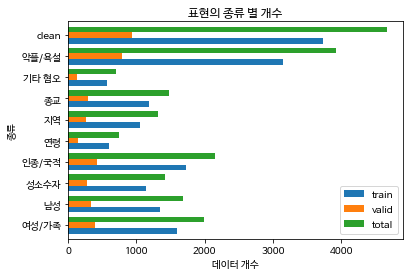

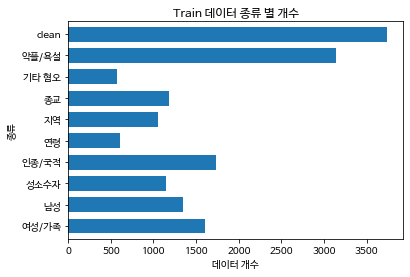

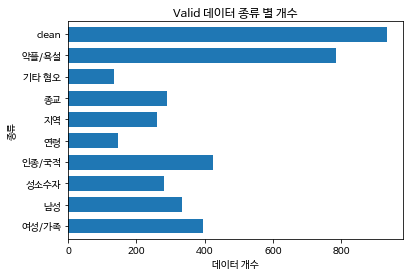

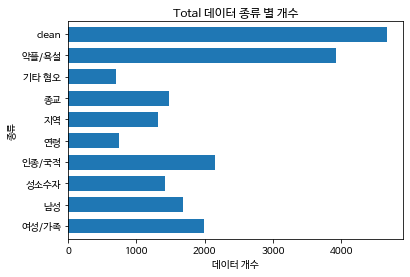

In [35]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

df.T.plot.barh(rot=0, width = 0.8)
plt.title("표현의 종류 별 개수")
plt.xlabel("데이터 개수")
plt.ylabel("종류")
plt.show()

df.loc['train'].plot.barh(rot=0, width = 0.7)
plt.title("Train 데이터 종류 별 개수")
plt.xlabel("데이터 개수")
plt.ylabel("종류")
plt.show()

df.loc['valid'].plot.barh(rot=0, width = 0.7)
plt.title("Valid 데이터 종류 별 개수")
plt.xlabel("데이터 개수")
plt.ylabel("종류")
plt.show()

df.loc['total'].plot.barh(rot=0, width = 0.7)
plt.title("Total 데이터 종류 별 개수")
plt.xlabel("데이터 개수")
plt.ylabel("종류")
plt.show()

In [ ]:
unsmile_labels = ["여성/가족","남성","성소수자","인종/국적","연령","지역","종교","기타 혐오","악플/욕설","clean"]
# 개인지칭의 경우, 추가 정보이므로 분류 대상에서 제외했습니다.